<a href="https://colab.research.google.com/github/JordiPG05/Potafolio/blob/main/Retenci%C3%B3n_de_clientes_bancarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Retención de clientes bancarios

Este proyecto trata de predecir en que casos los clientes se dan de baja de una entidad bancaria.

Teniendo en cuenta que como sabemos, es mucho más caro contratar a un nuevo cliente que mantener a uno existente.

Es ventajoso saber qué lleva a un cliente a tomar la decisión de abandonar la empresa.

La prevención de las bajas permite a las empresas desarrollar programas de fidelización y campañas de retención para conservar el mayor número posible de clientes.

#### **Primer contacto con los datos**

* RowNumber - corresponde al número de registro (fila) y no tiene ningún efecto sobre la salida.
* CustomerId - contiene valores aleatorios y no tiene ningún efecto sobre la salida del cliente del banco.
* Surname - el apellido de un cliente no influye en su decisión de abandonar el banco.
* CreditScore - ctiene un efecto sobre la rotación de clientes, ya que es menos probable que un cliente con una puntuación crediticia más alta abandone el banco.
* Geography - la ubicación de un cliente puede afectar a su decisión de abandonar el banco.
* Gender - es interesante estudiar si el sexo influye en que un cliente abandone el banco.
* Age - esto es ciertamente relevante, ya que los clientes de más edad son menos propensos a abandonar su banco que los más jóvenes.
* Tenure - Se refiere al número de años que el cliente lleva siendo cliente del banco. Normalmente, los clientes más antiguos son más fieles y menos propensos a abandonar un banco.
* Balance - también es un buen indicador de la rotación de clientes, ya que las personas con un saldo más alto en sus cuentas tienen menos probabilidades de abandonar el banco en comparación con las que tienen saldos más bajos.
* NumOfProducts - se refiere al número de productos que un cliente ha comprado a través del banco.
* HasCrCard - indica si un cliente tiene o no tarjeta de crédito. Esta columna también es relevante, ya que es menos probable que las personas con tarjeta de crédito abandonen el banco.
* IsActiveMember — Es menos probable que los clientes activos abandonen el banco.
* EstimatedSalary — Al igual que ocurre con el equilibrio, las personas con salarios más bajos tienen más probabilidades de abandonar el banco en comparación con las que tienen salarios más altos.
* Exited — si el cliente abandonó o no el banco.
* Complain — cliente tiene queja o no.
* Satisfaction Score — Puntuación proporcionada por el cliente para la resolución de su reclamación.
* Card Type — tipo de tarjeta que posee el cliente.
* Points Earned — los puntos obtenidos por el cliente por utilizar la tarjeta de crédito.




### **Importar librerias**

Para desarrollar este proyecto vamos a necesitar las siguientes librerías:
* pandas: Gestionar dataframes
* xgboost: Crear los modelos predictivos y obtener feature importance
* sklearn: Paquete que engloba gran parte del preprocesado de datos y evaluación de modelos
* matplotlib: Creación de gráficos (mejora la explicabilidad)


In [1]:
import pandas as pd
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

Cargamos los datos en un dataframe

In [2]:
df = pd.read_csv("/content/Customer-Churn-Records.csv")

Eliminamos las columnas innecesarias para el modelo

In [3]:
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)

Visualizamos los 5 primeros datos (control del dataframe)

In [4]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


Transformamos las variables categóricas a numéricas.

En este caso, vamos a utilizar un ordinal encoder, aunque se pueden utilizar otras técnicas, como LabelEncoder.

In [5]:
# Seleccionamos las variables categóricas
cat_cols = ["Geography", "Gender", "Card Type"]

# Inicializamos OrdinalEncoder
enc = OrdinalEncoder()

# Entrenamos el OrdinalEncoder
df[cat_cols] = enc.fit_transform(df[cat_cols])

In [6]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,0.0,0.0,42,2,0.00,1,1,1,101348.88,1,1,2,0.0,464
1,608,2.0,0.0,41,1,83807.86,1,0,1,112542.58,0,1,3,0.0,456
2,502,0.0,0.0,42,8,159660.80,3,1,0,113931.57,1,1,3,0.0,377
3,699,0.0,0.0,39,1,0.00,2,0,0,93826.63,0,0,5,1.0,350
4,850,2.0,0.0,43,2,125510.82,1,1,1,79084.10,0,0,5,1.0,425


Ahora los datos son todos numéricos, ya tenemos el preprocesado completado.

Dividimos el dataframe completo en 2 partes, Train y Test.

* Train: Serán los datos utilizados para entrenar el modelo.
* Test: Serán los datos utilizados para evaluar el modelo una vez entrenado.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("Exited", axis=1), df["Exited"], test_size=0.20, random_state=42)

Con el split de los datos ejecutados, vamos y definir los parámetros de nuestro modelo predictivo.

In [8]:
model = XGBClassifier(
    n_estimators=750,
    max_depth=4,
    learning_rate=0.01,
)

Me gustaría destacar que estos parámetros has sido previamente testeados mediante GridSearchCV en un notebook aparte.

Entrenamos el modelo con los datos de Train

In [9]:
model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric="logloss",
    early_stopping_rounds=1000,
    verbose=100,
)

[0]	validation_0-logloss:0.68325


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[100]	validation_0-logloss:0.20332
[200]	validation_0-logloss:0.07321
[300]	validation_0-logloss:0.02957
[400]	validation_0-logloss:0.01424
[500]	validation_0-logloss:0.00897
[600]	validation_0-logloss:0.00730
[700]	validation_0-logloss:0.00691
[749]	validation_0-logloss:0.00690


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=750, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [10]:
print(f"Best iteration: {model.best_iteration} - logloss: {model.best_score}")

Best iteration: 738 - logloss: 0.00689022985484917


Evaluamos el modelo con los datos de test

In [11]:
# Realizamos las predicciones
y_pred = model.predict(X_test)

# Obtenemos el accuraccy score con los datos de test y las predicciones
print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred) * 100))

Accuracy: 99.90%


**Objetivo final**

Una vez tenemos el modelo entrenado y evaluado (99,90% de accuracy), es momento de sacar nuestras conclusiones.

Para ello visualizamos el modelo con feature importance, pudiendo ver qué factor afecta más al modelo y, por lo tanto, que factor hay que tener más en cuenta a la hora de predecir la baja de un cliente.
*Para obtener más detalle e información sobre feature importance, se pueden realizar gráficos SHAP, pudiendo ver el comportamiento en casos concretos.*

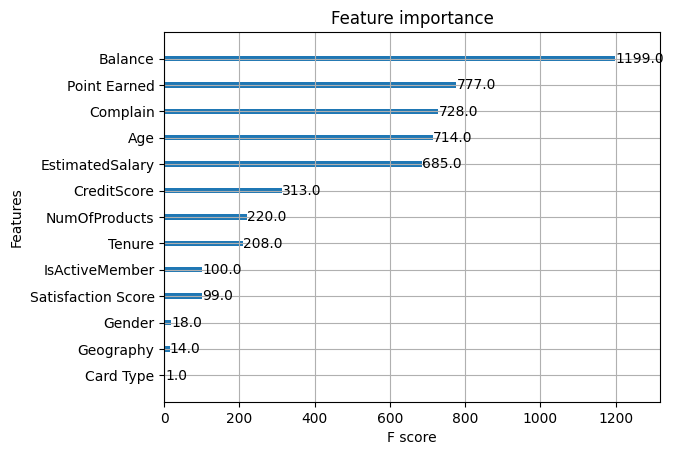

In [12]:
xgb.plot_importance(model)
plt.show()

Como podemos observar, la variable 'Balance' es la más importante a tener en cuenta.
En segundo lugar, tenemos 'Point Earned' y muy de cerca, 'Complain','Age','EstimatedSalary'.
Como destacábamos al inicio del proyecto, nuestras sospechas eran correctas, la cantidad de dinero en la cuenta es un factor clave a tener en cuenta, esto se puede expresar de varias formas:

1. Dinero actual en la cuenta
2. Capacidad de ganar dinero

Por un lado, vemos que la edad es fundamental.
Contra mayor es la persona, más estabilidad financiera quiere, seguramente debido a que tiene más obligaciones económicas.

Por otro lado, las quejas tienen una gran repercusión en las bajas.

Similar a lo que pasa en las empresas de servicios telefónicos, tener problemas con los bancos supone un gran descontento en el usuario, pudiendo, si tener un buen servicio al cliente, suponer la baja.